                         demand     temp_C  hour  dayofweek  dayofyear
timestamp                                                             
2024-11-20 01:00:00  192.276504  10.491150     1          2        325
2024-11-20 02:00:00  205.015078   9.312244     2          2        325
2024-11-20 03:00:00  209.847435   9.803525     3          2        325
2024-11-20 04:00:00  217.954580  10.712039     4          2        325
2024-11-20 05:00:00  220.223136   9.742822     5          2        325
Eval: {'mae': 4.308677354773146, 'rmse': 5.441878979893662}


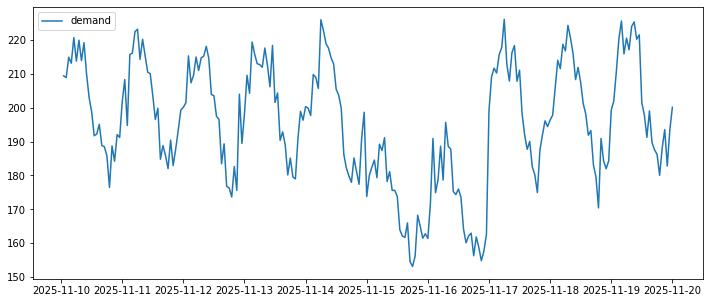

In [1]:
# Forecast pipeline analysis (script-style, suitable for conversion to notebook)
import pandas as pd
import numpy as np
from src.model import feature_engineer, train_rf, evaluate_model
import matplotlib.pyplot as plt

df = pd.read_csv('data/energy.csv', parse_dates=['timestamp'], index_col='timestamp')
df = df.sort_index()
print(df.head())

X = feature_engineer(df)
y = df['demand'].values

split_idx = int(len(X)*0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = train_rf(X_train, y_train)
metrics = evaluate_model(model, X_test, y_test)
print('Eval:', metrics)

plt.figure(figsize=(12,5))
plt.plot(df['demand'][-240:], label='demand')
plt.legend()
plt.show()
